In [67]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
os.chdir('/Users/simonemezzabotta/Coding Projects/GoalGenius')
print(os.getcwd())

/Users/simonemezzabotta/Coding Projects/GoalGenius


In [68]:
from src.ingest.github_ingest import load_matches, load_elo


matches = load_matches()
elo = load_elo()

matches.head()

/Users/simonemezzabotta/Coding Projects/GoalGenius/src/ingest/github_ingest.py:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, parse_dates=["MatchDate"])


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.4,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaN,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,0.0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaN,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,0.0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
elo.head()

,date,club,country,elo
0,2000-07-01,Aachen,GER,1453.60
1,2000-07-01,Aalborg,DEN,1482.61
2,2000-07-01,Aalst,BEL,1337.53
3,2000-07-01,Aarhus,DEN,1381.46
4,2000-07-01,Aberdeen,SCO,1360.43


# Matches EDA

Let's start with matches

In [70]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Division     228377 non-null  object        
 1   MatchDate    228377 non-null  datetime64[ns]
 2   MatchTime    96892 non-null   object        
 3   HomeTeam     228377 non-null  object        
 4   AwayTeam     228377 non-null  object        
 5   HomeElo      139910 non-null  float64       
 6   AwayElo      139842 non-null  float64       
 7   Form3Home    226877 non-null  float64       
 8   Form5Home    226877 non-null  float64       
 9   Form3Away    226877 non-null  float64       
 10  Form5Away    226877 non-null  float64       
 11  FTHome       228374 non-null  float64       
 12  FTAway       228374 non-null  float64       
 13  FTResult     228374 non-null  object        
 14  HTHome       173797 non-null  float64       
 15  HTAway       173797 non-null  floa

In [71]:
matches.shape

(228377, 42)

In [72]:
matches.describe()

,MatchDate,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,HTHome,HTAway,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
count,228377,139910.000000,139842.000000,226877.000000,226877.000000,226877.000000,226877.000000,228374.000000,228374.000000,173797.000000,173797.000000,112555.000000,112558.000000,111749.000000,111752.000000,111793.000000,111793.000000,112183.000000,112183.000000,117118.000000,117119.000000,117119.000000,117117.000000,225347.000000,225347.000000,225347.000000,200742.000000,200742.000000,200742.000000,146218.000000,146217.000000,146218.000000,146217.000000,154553.000000,154300.000000,154276.000000
mean,2014-09-28 07:26:47.505134080,1532.963352,1533.012573,3.984670,6.721461,4.202925,6.927608,1.488458,1.149890,0.657411,0.502385,12.760908,10.414346,5.124985,4.143407,12.620871,13.080166,5.666402,4.617990,1.681791,1.984375,0.086340,0.117114,2.460052,3.609793,4.019582,2.674176,3.873779,4.513777,1.945049,1.891252,2.046240,1.985967,-0.303530,1.919515,1.955102
min,2000-07-28 00:00:00,1103.130000,1103.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.290000,1.010000,1.020000,1.200000,0.000000,1.090000,1.200000,1.110000,1.260000,-99.900000,0.000000,-0.500000
25%,2009-10-10 00:00:00,1424.770000,1424.830000,2.000000,4.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,9.000000,10.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.750000,3.210000,2.600000,1.850000,3.400000,2.720000,1.750000,1.670000,1.830000,1.750000,-0.500000,1.830000,1.830000
50%,2015-08-08 00:00:00,1515.445000,1515.440000,4.000000,7.000000,4.000000,7.000000,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,5.000000,4.000000,12.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.150000,3.400000,3.330000,2.300000,3.600000,3.600000,1.940000,1.820000,2.040000,1.910000,-0.300000,1.920000,1.930000
75%,2020-06-09 00:00:00,1633.977500,1633.967500,6.000000,9.000000,6.000000,9.000000,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,7.000000,6.000000,15.000000,16.000000,7.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.670000,3.700000,4.500000,2.880000,3.970000,5.000000,2.120000,2.020000,2.250000,2.120000,0.000000,2.010000,2.020000
max,2025-02-26 00:00:00,2107.480000,2107.480000,9.000000,15.000000,9.000000,15.000000,10.000000,13.000000,7.000000,7.000000,46.000000,45.000000,31.000000,23.000000,145.000000,77.000000,26.000000,23.000000,11.000000,10.000000,3.000000,9.000000,53.180000,22.550000,71.710000,126.000000,47.000000,301.000000,3.950000,6.750000,172.000000,238.000000,12.500000,177.000000,15.140000
std,NaN,153.172398,153.221114,2.377063,3.256892,2.392875,3.269290,1.259044,1.112718,0.812317,0.715215,4.990563,4.453851,2.765648,2.430047,4.476443,4.550530,2.940378,2.624633,1.306543,1.373488,0.297375,0.346678,1.372111,0.847635,2.647195,1.802028,1.100686,3.818925,0.276526,0.333801,0.540455,0.722145,0.729571,0.498840,0.353940


There are 228377 rows and 42 columns in the matches dataset. I can see that many columns have missing values. Data goes from 28/07/2000 to 26/02/2025.

All data come as 'float64', except for 'MatchDate' (datetime64). There are also several categorical columns:
- 'Division'
- 'MatchTime'
- 'HomeTeam'
- 'AwayTeam'
- 'FTResult'
- 'HTResult'

First of all, let's change 'MatchTime' to a time object

In [73]:
matches_reduced = matches.copy()
matches_reduced['MatchTime'] = pd.to_datetime(matches_reduced['MatchTime'], format='%H:%M:%S', errors='coerce').dt.time
matches_reduced['MatchTime'].unique()

array([NaT, datetime.time(3, 0), datetime.time(4, 0),
       datetime.time(13, 0), datetime.time(16, 30), datetime.time(17, 0),
       datetime.time(19, 0), datetime.time(19, 5), datetime.time(19, 45),
       datetime.time(20, 0), datetime.time(0, 0), datetime.time(0, 30),
       datetime.time(1, 30), datetime.time(2, 0), datetime.time(22, 30),
       datetime.time(3, 30), datetime.time(6, 0), datetime.time(10, 0),
       datetime.time(10, 30), datetime.time(11, 0), datetime.time(12, 30),
       datetime.time(13, 30), datetime.time(14, 45), datetime.time(15, 0),
       datetime.time(16, 0), datetime.time(17, 30), datetime.time(18, 45),
       datetime.time(19, 30), datetime.time(20, 15), datetime.time(23, 0),
       datetime.time(14, 30), datetime.time(18, 0), datetime.time(18, 5),
       datetime.time(18, 30), datetime.time(12, 0), datetime.time(6, 30),
       datetime.time(9, 30), datetime.time(21, 30), datetime.time(22, 15),
       datetime.time(0, 20), datetime.time(1, 0), datetime

In [74]:
matches_reduced.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway,MaxHome,MaxDraw,MaxAway,Over25,Under25,MaxOver25,MaxUnder25,HandiSize,HandiHome,HandiAway
0,F1,2000-07-28,NaT,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,2.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.3,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaT,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.4,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaT,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaT,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,0.0,1.0,0.0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaT,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,0.0,1.0,3.0,A,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop odds columns and HT Features, since we’re building a pre-match prediction model and we won’t know halftime scores before the match.

In [75]:
columns_to_drop = [
    'OddHome', 'OddDraw', 'OddAway',
    'MaxHome', 'MaxDraw', 'MaxAway',
    'Over25', 'Under25', 'MaxOver25', 'MaxUnder25',
    'HandiSize', 'HandiHome', 'HandiAway', 'HTHome', 'HTResult', 'HTAway'
]
matches_reduced = matches_reduced.drop(columns=columns_to_drop)
matches_reduced.head()

,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,F1,2000-07-28,NaT,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaT,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaT,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,0.0,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F2,2000-07-29,NaT,Ajaccio,Le Mans,1470.87,1477.89,0.0,0.0,0.0,0.0,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F2,2000-07-29,NaT,Beauvais,Montpellier,1422.21,1606.00,0.0,0.0,0.0,0.0,1.0,3.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
matches_reduced.Division.unique()

array(['F1', 'F2', 'D1', 'D2', 'T1', 'B1', 'E2', 'E1', 'N1', 'P1', 'E0',
       'I2', 'SP2', 'SP1', 'I1', 'E3', 'SC0', 'SC1', 'SC2', 'SC3', 'G1',
       'EC', 'USA', 'SWE', 'NOR', 'IRL', 'BRA', 'ARG', 'MEX', 'JAP',
       'RUS', 'POL', 'DEN', 'ROM', 'AUT', 'SUI', 'FIN', 'CHN'],
      dtype=object)

For this project, we will only focus on the top-5 European leagues, which are:
- Premier League (E1)
- Serie A (I1)
- La Liga (SP1)
- Bundesliga (D1)
- Ligue 1 (F1)

In [77]:
# Filter data for the top 5 divisions
top_divisions = ['E1', 'I1', 'SP1', 'D1', 'F1']
matches_reduced = matches_reduced[matches_reduced['Division'].isin(top_divisions)]
print(matches_reduced['Division'].unique())
matches_reduced['Division'].value_counts()

['F1' 'D1' 'E1' 'SP1' 'I1']


Division
E1     13462
I1      8891
SP1     8878
F1      8657
D1      7423
Name: count, dtype: int64

In [78]:
matches_reduced.shape

(47311, 26)

## Deal with NaNs

Let's check the NaNs distributions

In [79]:
matches_reduced.isnull().sum() 

Division           0
MatchDate          0
MatchTime      36168
HomeTeam           0
AwayTeam           0
HomeElo          150
AwayElo          155
Form3Home          0
Form5Home          0
Form3Away          0
Form5Away          0
FTHome             0
FTAway             0
FTResult           0
HomeShots       4914
AwayShots       4914
HomeTarget      5720
AwayTarget      5720
HomeFouls       5671
AwayFouls       5671
HomeCorners     5289
AwayCorners     5289
HomeYellow      4900
AwayYellow      4899
HomeRed         4899
AwayRed         4899
dtype: int64

Since I don't expect Match Time to have such an impact on results and it has a lot of missing values, let's drop it from the Dataset

In [80]:
matches_reduced = matches_reduced.drop(columns='MatchTime')
matches_reduced.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed
0,F1,2000-07-28,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F1,2000-07-29,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,0.0,0.0,1.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F1,2000-07-29,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,0.0,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,F1,2000-07-29,Guingamp,St Etienne,1578.51,1620.74,0.0,0.0,0.0,0.0,2.0,2.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Count how many rows have NaN values in total 
print(matches_reduced.isna().any(axis=1).sum())

matches_reduced.isnull().sum() 

6786


Division          0
MatchDate         0
HomeTeam          0
AwayTeam          0
HomeElo         150
AwayElo         155
Form3Home         0
Form5Home         0
Form3Away         0
Form5Away         0
FTHome            0
FTAway            0
FTResult          0
HomeShots      4914
AwayShots      4914
HomeTarget     5720
AwayTarget     5720
HomeFouls      5671
AwayFouls      5671
HomeCorners    5289
AwayCorners    5289
HomeYellow     4900
AwayYellow     4899
HomeRed        4899
AwayRed        4899
dtype: int64

For now, since we’re in the exploration phase, let's drop rows with missing ELO or HT scores, since very few are missing, and also drop columns with >10% missing data. Later, we can reintroduce features for performance tuning.

In [82]:
# Drop rows with missing Elo or HT scores (very few missing)
matches_clean = matches_reduced.copy()
matches_clean= matches_clean.dropna(subset=['HomeElo', 'AwayElo'])

# Drop columns with >10% missing data if not core to your model
matches_clean = matches_clean.drop(columns=[
    'HomeShots', 'AwayShots', 'HomeTarget', 'AwayTarget',
    'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
    'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed'
])

print(matches_clean.isnull().sum())
print(matches_clean.shape)

Division     0
MatchDate    0
HomeTeam     0
AwayTeam     0
HomeElo      0
AwayElo      0
Form3Home    0
Form5Home    0
Form3Away    0
Form5Away    0
FTHome       0
FTAway       0
FTResult     0
dtype: int64
(47007, 13)


## Check and Deal with Outliers

### Visual Inspection

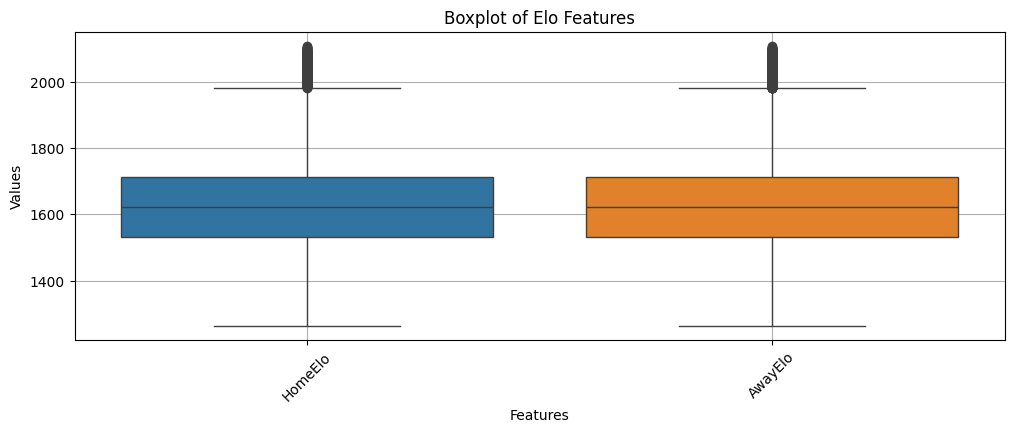

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=matches_clean[["HomeElo", "AwayElo"]])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Elo Features")
plt.grid(True)
plt.show()

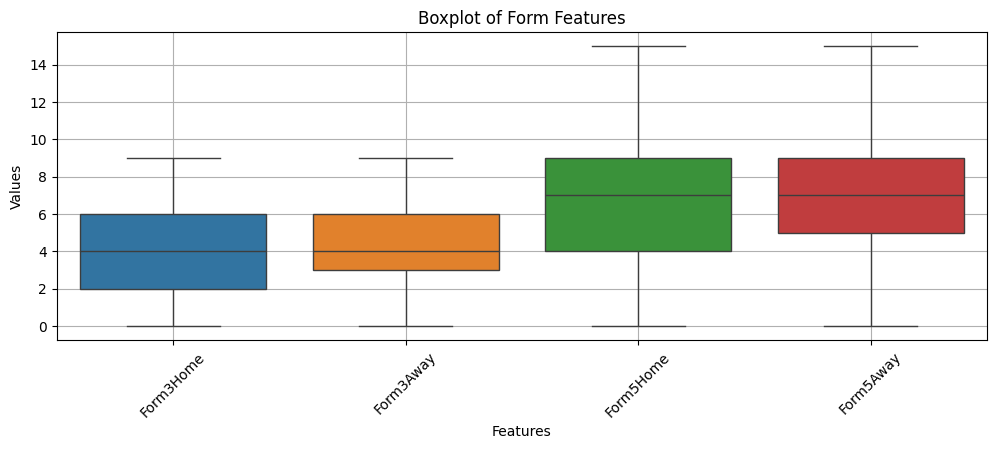

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=matches_clean[["Form3Home", "Form3Away", "Form5Home", "Form5Away"]])
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Form Features")
plt.grid(True)
plt.show()

It looks like ELO Ratings have some outliers. Let's inspect those

### Quantitative Check

In [85]:
def detect_outliers_iqr(data, columns=None):
    """
    Detect outliers in a DataFrame or Series using the IQR method.
    If a DataFrame is passed, specify columns as a list of column names.
    Returns a DataFrame with outliers (NaN where not outlier).
    """
    if isinstance(data, pd.Series):
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        return data[(data < lower) | (data > upper)]
    elif isinstance(data, pd.DataFrame):
        if columns is None:
            columns = data.columns
        outliers = pd.DataFrame(index=data.index)
        for col in columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers[col] = data[col].where((data[col] < lower) | (data[col] > upper))
        return outliers
    else:
        raise ValueError("Input must be a pandas Series or DataFrame")

outliers_elo = detect_outliers_iqr(matches_clean, columns=["HomeElo", "AwayElo"])
outliers_form = detect_outliers_iqr(matches_clean, columns=["Form3Home", "Form3Away", "Form5Home", "Form5Away"])

print(f"Elo outliers: {outliers_elo.count().sum()}")
print(f"Form outliers: {outliers_form.count().sum()}")

Elo outliers: 995
Form outliers: 0


In [86]:
#How many outliers are there per column?
print("Elo outliers per column:")
for col in outliers_elo.columns:
    outliers = detect_outliers_iqr(matches_clean[col])
    print(f"{col}: {outliers.count()}")

Elo outliers per column:
HomeElo: 491
AwayElo: 504


## Explore Relationships Between Variables

### 1. Target Distribution
Target: FTResult (H, D, A)

In [87]:
print(matches_clean["FTResult"].value_counts())
print(matches_clean["FTResult"].value_counts(normalize=True))

FTResult
H    21222
A    13305
D    12480
Name: count, dtype: int64
FTResult
H    0.451465
A    0.283043
D    0.265492
Name: proportion, dtype: float64


Let's apply a custom mapping to the target variable to boost model perfomance

FTResult Mapping:
- 'H' → 1
- 'D' → 0
- 'A' → 2

In [88]:
matches_clean["FTResult"] = matches_clean["FTResult"].map({'H': 1, 'D': 0, 'A': 2})
matches_clean.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,FTHome,FTAway,FTResult
0,F1,2000-07-28,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,0.0,3.0,1.0,1
1,F1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,0.0,3.0,1.0,1
12,F1,2000-07-29,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,0.0,0.0,1.0,2
13,F1,2000-07-29,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,0.0,1.0,1.0,0
14,F1,2000-07-29,Guingamp,St Etienne,1578.51,1620.74,0.0,0.0,0.0,0.0,2.0,2.0,0


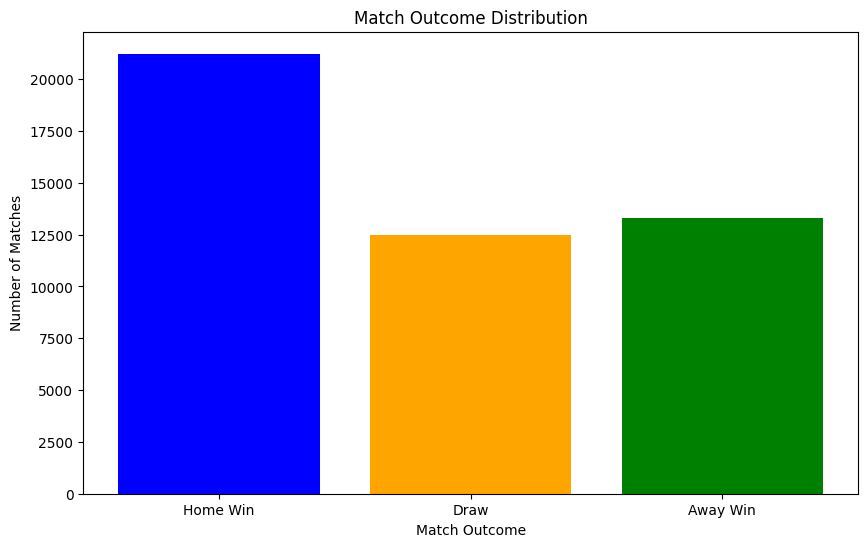

In [89]:
import matplotlib.pyplot as plt

# Get value counts and ensure all categories are included
outcome_counts = matches_clean["FTResult"].value_counts().reindex([1, 0, 2], fill_value=0)

# Define labels and colors
labels = ["Home Win", "Draw", "Away Win"]
colors = ["blue", "orange", "green"]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts, color=colors)
plt.title("Match Outcome Distribution")
plt.ylabel("Number of Matches")
plt.xlabel("Match Outcome")
plt.xticks(rotation=0)

plt.show()

Key Takeaways:	
 1.	Home Advantage is Strong: Nearly half of all matches end in a home win. This is typical in football and should be reflected in the model.

2.	Moderate Class Imbalance: The classes aren’t extremely skewed, but Home Win is clearly the dominant class.



### 2. Correlation between Numerics

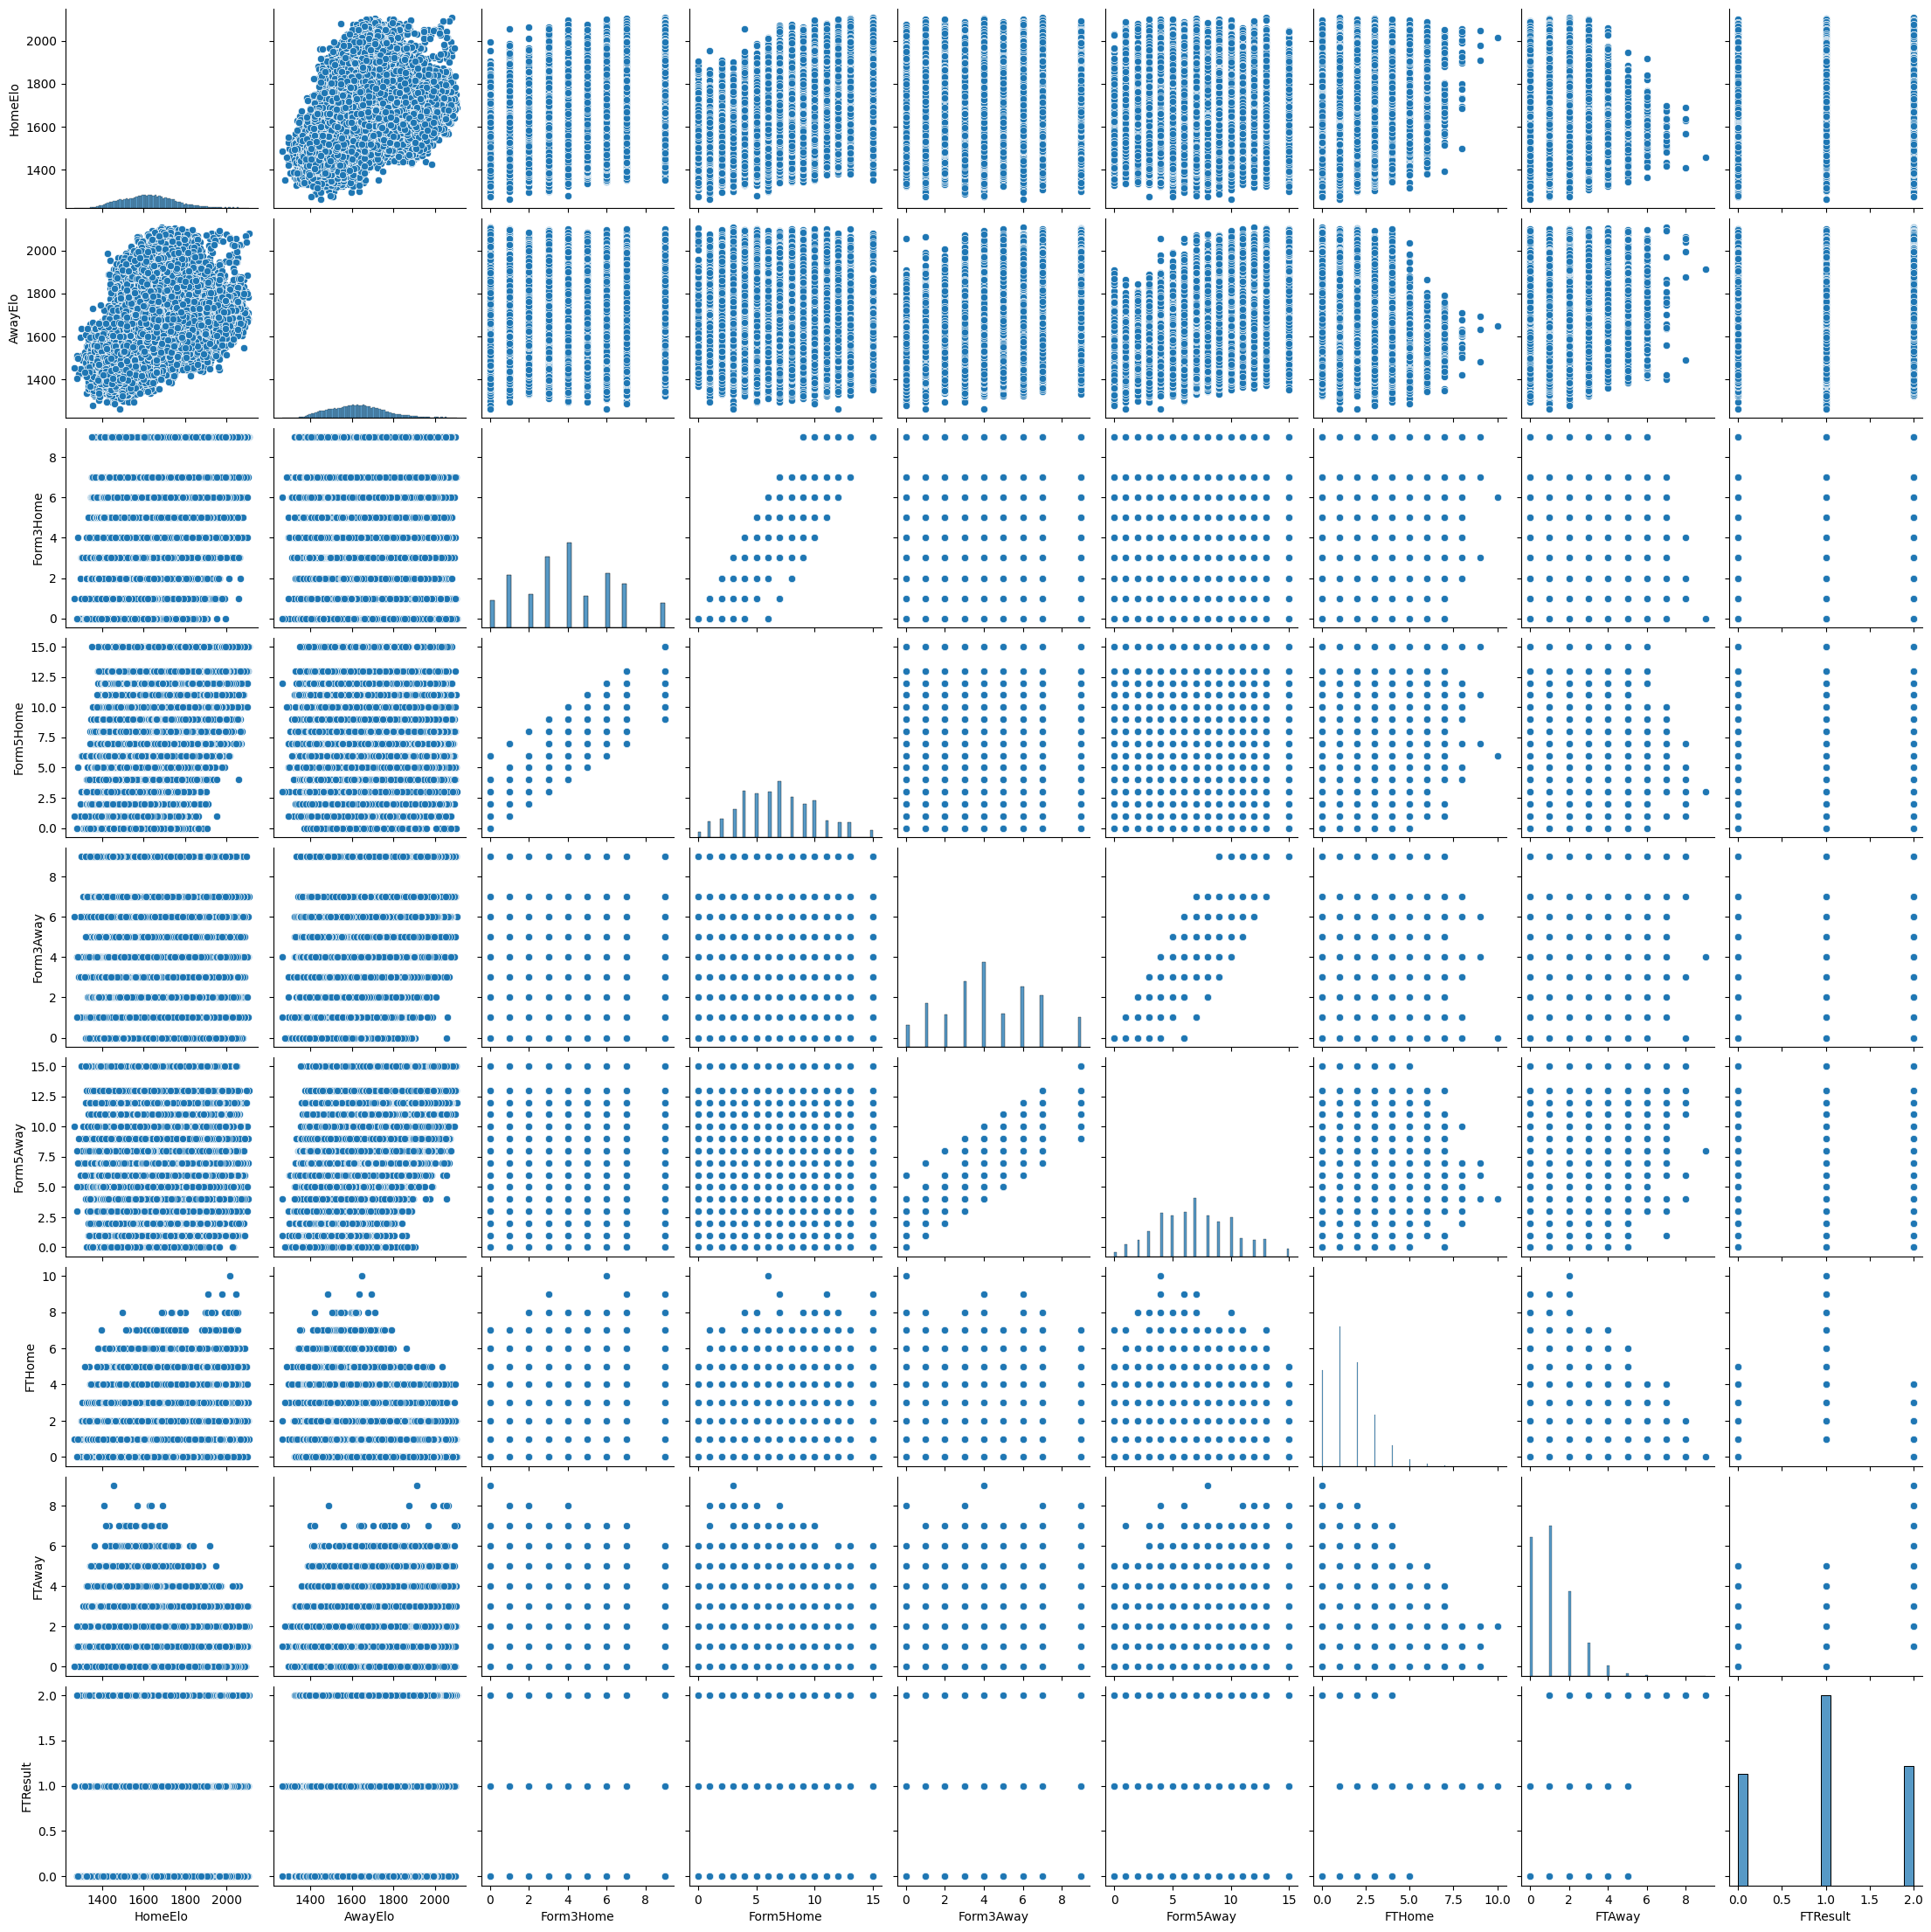

In [90]:
import seaborn as sns

sns.pairplot(matches_clean)
plt.show()

<Axes: >

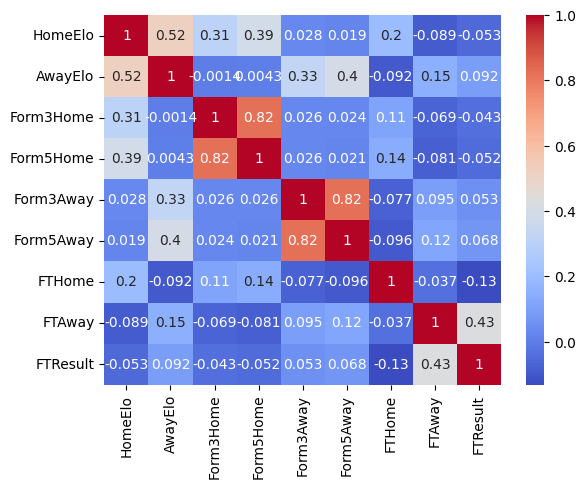

In [91]:
import seaborn as sns
sns.heatmap(matches_clean.corr(numeric_only=True), annot=True, cmap="coolwarm")

🔥 Features Worth Keeping:
- HomeElo, AwayElo
- Form3Home, Form5Home, Form3Away, Form5Away
- FTHome, FTAway

These are correlated with FTResult, and generally not too strongly correlated with each other (apart from Form3X vs Form5X, which we will reduce).

⸻

⚠️ Redundant Pairs:
- Form3Home and Form5Home: consider keeping just one (or combining into a weighted form score).
- Same for Form3Away / Form5Away.

In [92]:
# Let's create a new feature for the home and away teams' form scores
# based on the last 3 and 5 matches
matches_clean["HomeFormScore"] = (
    0.6 * matches_clean["Form3Home"] + 0.4 * matches_clean["Form5Home"]
)

matches_clean["AwayFormScore"] = (
    0.6 * matches_clean["Form3Away"] + 0.4 * matches_clean["Form5Away"]
)

matches_clean = matches_clean.drop(columns=['Form3Home', 'Form5Home', 'Form3Away', 'Form5Away'])
matches_clean.head()

,Division,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,FTHome,FTAway,FTResult,HomeFormScore,AwayFormScore
0,F1,2000-07-28,Marseille,Troyes,1686.34,1586.57,3.0,1.0,1,0.0,0.0
1,F1,2000-07-28,Paris SG,Strasbourg,1714.89,1642.51,3.0,1.0,1,0.0,0.0
12,F1,2000-07-29,Auxerre,Sedan,1635.58,1624.22,0.0,1.0,2,0.0,0.0
13,F1,2000-07-29,Bordeaux,Metz,1734.34,1673.11,1.0,1.0,0,0.0,0.0
14,F1,2000-07-29,Guingamp,St Etienne,1578.51,1620.74,2.0,2.0,0,0.0,0.0


<Axes: >

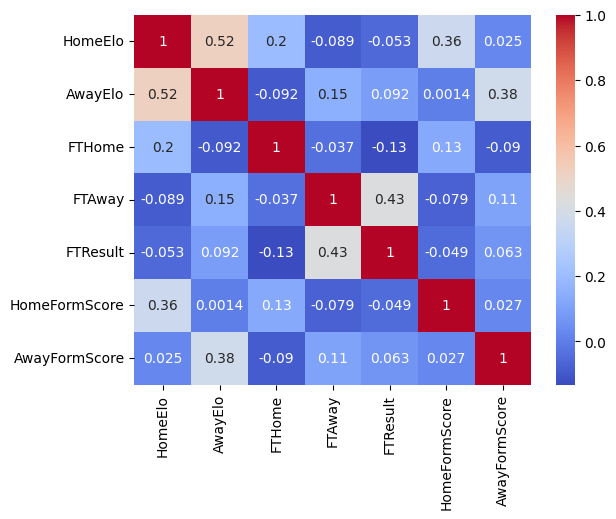

In [93]:
# Let's explore the correlation between the new form scores and the match outcome
import seaborn as sns
sns.heatmap(matches_clean.corr(numeric_only=True), annot=True, cmap="coolwarm")

## 3. Home vs Away Performance

### A. HomeElo vs AwayElo

Stronger Elo team tends to win?

In [94]:
# Create a new feature for the Elo difference
matches_clean["EloDiff"] = matches_clean["HomeElo"] - matches_clean["AwayElo"]
matches_clean.EloDiff.head()

0     99.77
1     72.38
12    11.36
13    61.23
14   -42.23
Name: EloDiff, dtype: float64

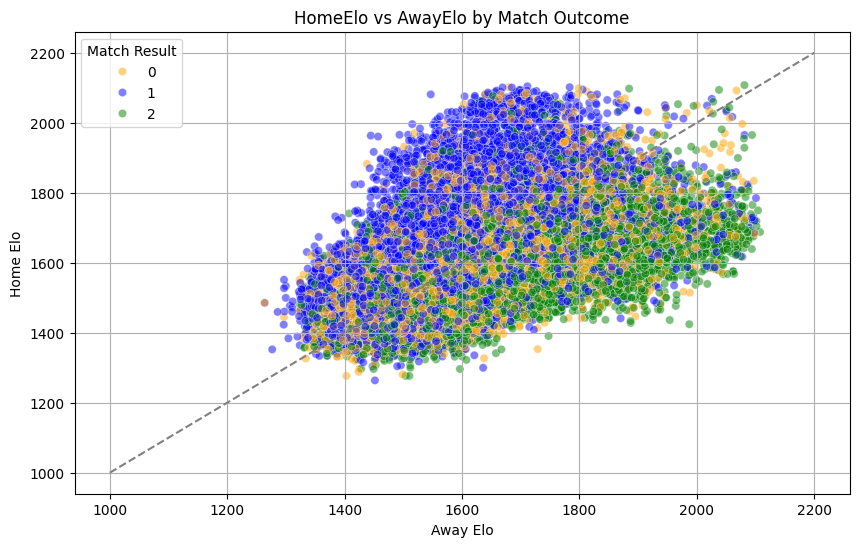

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=matches_clean, 
    x="AwayElo", 
    y="HomeElo", 
    hue="FTResult",  
    palette={1: "blue", 0: "orange", 2: "green"},
    alpha=0.5
)
plt.title("HomeElo vs AwayElo by Match Outcome")
plt.plot([1000, 2200], [1000, 2200], color="gray", linestyle="--")  # diagonal line
plt.xlabel("Away Elo")
plt.ylabel("Home Elo")
plt.legend(title="Match Result", loc="upper left")
plt.grid(True)
plt.show()

As expected, most home wins (1) cluster above the diagonal, representing matches where the home team had a higher Elo.

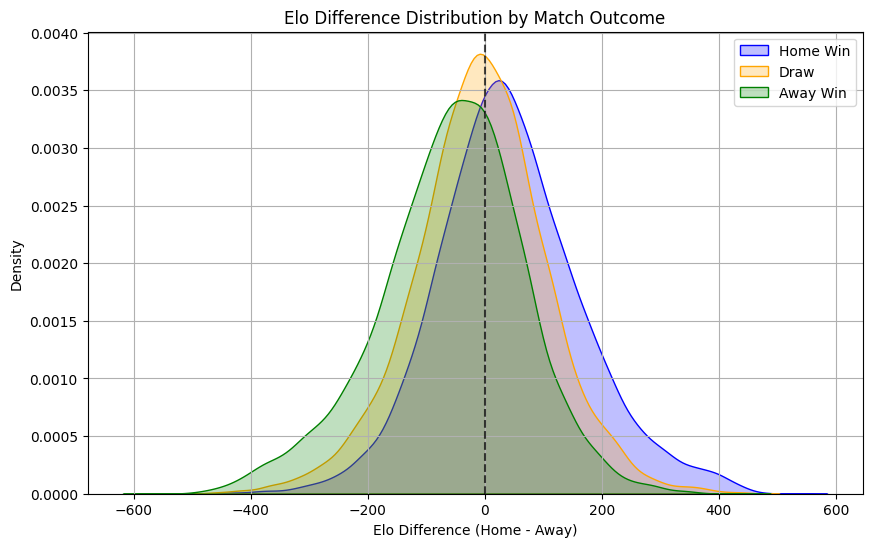

In [96]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 1], x="EloDiff", label="Home Win", color="blue", fill=True)
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 0], x="EloDiff", label="Draw", color="orange", fill=True)
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 2], x="EloDiff", label="Away Win", color="green", fill=True)

plt.title("Elo Difference Distribution by Match Outcome")
plt.xlabel("Elo Difference (Home - Away)")
plt.ylabel("Density")
plt.axvline(0, color="black", linestyle="--", alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

Key takeaways: 
- Elo difference is a highly informative feature.
- It behaves intuitively:
	- Positive → home team more likely to win
	- Near 0 → likely draw
	- Negative → away team more likely to win

Since we will use EloDiff, let's drop HomeElo and AwayELo to avoid multicollinearity issues

In [97]:
matches_clean = matches_clean.drop(columns=["HomeElo", "AwayElo"])
matches_clean.head()

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HomeFormScore,AwayFormScore,EloDiff
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,1,0.0,0.0,99.77
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,1,0.0,0.0,72.38
12,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,2,0.0,0.0,11.36
13,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,0,0.0,0.0,61.23
14,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,0,0.0,0.0,-42.23


## 4. Form Momentum


Question: Do teams in better recent form win more often?

In [98]:
matches_clean["FormDiff"] = matches_clean["HomeFormScore"] - matches_clean["AwayFormScore"]
matches_clean.FormDiff.head()

0     0.0
1     0.0
12    0.0
13    0.0
14    0.0
Name: FormDiff, dtype: float64

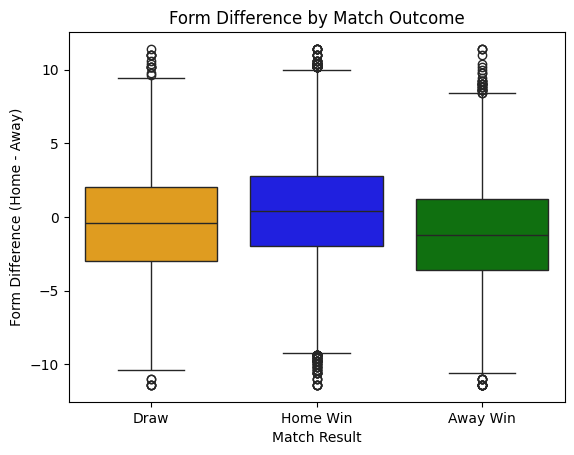

In [99]:
# Let's plot the distribution of the form difference by match outcome
sns.boxplot(x="FTResult", y="FormDiff", data=matches_clean, hue="FTResult", palette={1: "blue", 0: "orange", 2: "green"})
plt.xlabel("Match Result")
plt.ylabel("Form Difference (Home - Away)")
plt.title("Form Difference by Match Outcome")
plt.xticks([1, 0, 2], ["Home Win", "Draw", "Away Win"])
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

It seems to behave as expected, but the results aren't as clear cut as EloDiff. Let's create a KDE plot 

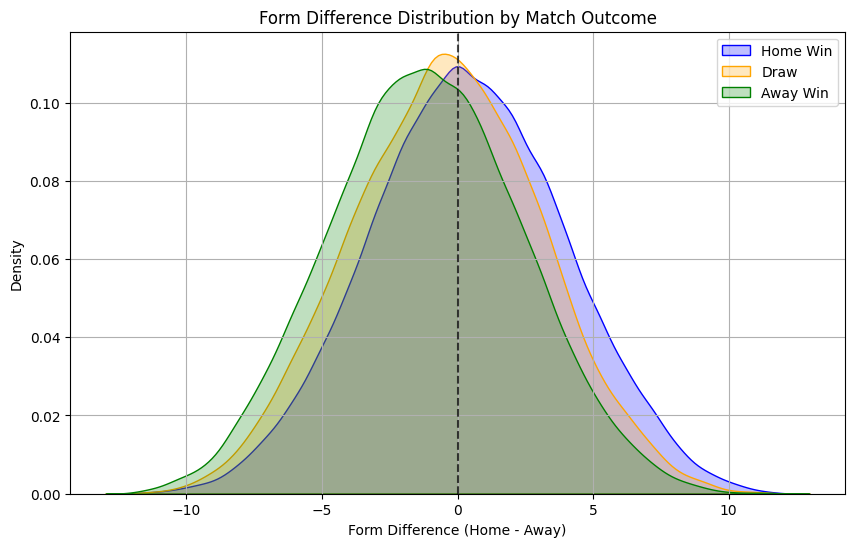

In [100]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 1], x="FormDiff", label="Home Win", color="blue", fill=True)
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 0], x="FormDiff", label="Draw", color="orange", fill=True)
sns.kdeplot(data=matches_clean[matches_clean["FTResult"] == 2], x="FormDiff", label="Away Win", color="green", fill=True)

plt.title("Form Difference Distribution by Match Outcome")
plt.xlabel("Form Difference (Home - Away)")
plt.ylabel("Density")
plt.axvline(0, color="black", linestyle="--", alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

Key takeaways:

- Form difference is a useful indicator for predicting outcomes:
- Home teams with significantly better form are more likely to win.
- Away teams with better form often win too.
- When teams are evenly matched, a draw is more likely.



In [101]:
# Let's drop HomeFormScore and AwayFormScore as they are now redundant
matches_clean = matches_clean.drop(columns=["HomeFormScore", "AwayFormScore"])
matches_clean.head()

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,EloDiff,FormDiff
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,1,99.77,0.0
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,1,72.38,0.0
12,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,2,11.36,0.0
13,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,0,61.23,0.0
14,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,0,-42.23,0.0


In [102]:
matches_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47007 entries, 0 to 228366
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Division   47007 non-null  object        
 1   MatchDate  47007 non-null  datetime64[ns]
 2   HomeTeam   47007 non-null  object        
 3   AwayTeam   47007 non-null  object        
 4   FTHome     47007 non-null  float64       
 5   FTAway     47007 non-null  float64       
 6   FTResult   47007 non-null  int64         
 7   EloDiff    47007 non-null  float64       
 8   FormDiff   47007 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 3.6+ MB


## Check Outliers (Again)

Since we've engineered some new features, let's check for outliers again

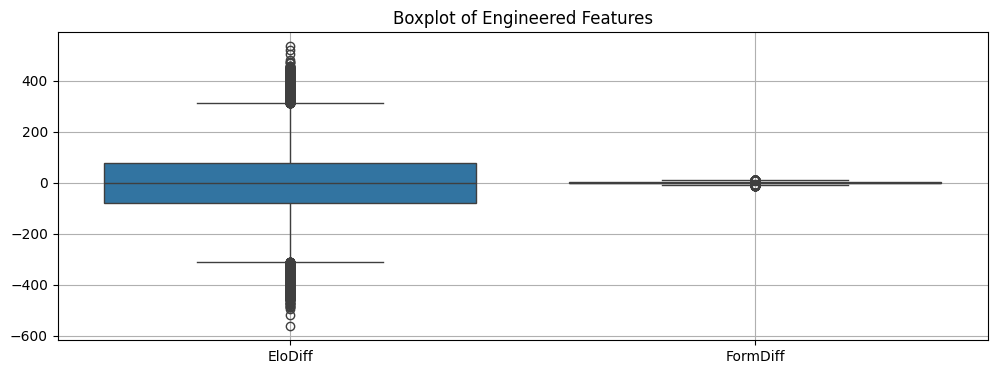

In [103]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=matches_clean[["EloDiff", "FormDiff"]])
plt.title("Boxplot of Engineered Features")
plt.grid(True)
plt.show()

In [104]:
outliers_diff = detect_outliers_iqr(matches_clean, columns=["EloDiff", "FormDiff"])
print("Elo outliers per column:")
for col in outliers_diff.columns:
    outliers = detect_outliers_iqr(matches_clean[col])
    print(f"{col}: {outliers.count()}")

Elo outliers per column:
EloDiff: 1331
FormDiff: 155


Key takeaways:
- EloDiff Outliers: ⚠️ Significant
	- 1331 rows is non-trivial.
	- These likely reflect:
	    - Very unbalanced matches (e.g., elite vs. relegation-tier teams)
	    - Corrupted or outdated Elo ratings (e.g., team resets, missing updates)

- FormDiff Outliers: ✅ Minor
	- 155 rows (~0.3%) is manageable.
	- Form is typically bounded (e.g., 0–5 wins), so outliers may simply be legitimate extremes (e.g., 5W vs 0W).

To manage this, we will create 2 versions of the dataset at the model creation phase, one with clipped values for EloDiff and FormDiff and the other without them. We will use the first to train and evaluate a Logistic Regression model, while the other two will be used for a Random Forest and XGBoost model.

## Feature Engineering

### Head to Head

Not all matches are equal: some rivalries go beyond numbers. Let's create a feature that captures head to head results.

In [105]:
def compute_h2h_score(df, decay_factor=0.5):
    """
    Create H2H feature using all available results with exponential decay.
    More recent matches have higher impact on the H2H score.

    Args:
        df (DataFrame): DataFrame with 'HomeTeam', 'AwayTeam', 'FTResult', 'MatchDate'.
        decay_factor (float): Decay factor for weighting past matches (0 < decay_factor < 1).

    Returns:
        List: List of H2H scores for each match in the DataFrame.
    """
    df_sorted = df.sort_values("MatchDate")
    h2h_scores = []
    h2h_history = {}

    for idx, row in df_sorted.iterrows():
        home = row["HomeTeam"]
        away = row["AwayTeam"]
        pair = tuple(sorted([home, away]))
        history = h2h_history.get(pair, [])

        # Calculate exponentially decaying weighted score from history (from home team's perspective)
        if not history:
            h2h_scores.append(0)
        else:
            score = 0
            total_weight = 0
            # Most recent match is last in history
            for i, match in enumerate(reversed(history)):
                weight = decay_factor ** i
                total_weight += weight
                if match[0] == home:
                    score += match[1] * weight
                else:
                    score -= match[1] * weight  # invert if the other team was home
            h2h_scores.append(score / total_weight if total_weight > 0 else 0)

        # Update history: always store (team, result_value) where team is the home team in that match
        result_value = 3 if row["FTResult"] == 1 else (-3 if row["FTResult"] == 2 else 0)
        history.append((home, result_value))
        h2h_history[pair] = history

    return h2h_scores

matches_clean["H2H"] = compute_h2h_score(matches_clean)
matches_clean.tail(20)

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,EloDiff,FormDiff,H2H
228313,I1,2025-02-23,Como,Napoli,2.0,1.0,1,-266.80,-1.2,0.489229
228314,E1,2025-02-23,Watford,Luton,2.0,0.0,1,15.25,2.6,0.968689
228320,SP1,2025-02-23,Ath Bilbao,Valladolid,7.0,1.0,1,255.22,6.6,-0.726513
228326,F1,2025-02-23,Nantes,Lens,3.0,1.0,1,-143.64,-0.4,-2.564547
228327,I1,2025-02-23,Verona,Fiorentina,1.0,0.0,1,-180.64,-2.0,-0.362294
228331,D1,2025-02-23,RB Leipzig,Heidenheim,2.0,2.0,0,190.46,5.8,-1.431731
228336,SP1,2025-02-23,Real Madrid,Girona,2.0,0.0,1,270.33,1.4,-2.881772
228342,F1,2025-02-23,Le Havre,Toulouse,1.0,4.0,2,-128.90,2.0,-2.366569
228343,F1,2025-02-23,Nice,Montpellier,2.0,0.0,1,121.05,5.8,-1.416225
228344,F1,2025-02-23,Strasbourg,Brest,0.0,0.0,0,-31.22,1.2,-0.677419


In [106]:
matches_clean.H2H.describe()

count    47007.000000
mean        -0.155307
std          1.683265
min         -3.000000
25%         -1.379648
50%          0.000000
75%          1.001616
max          3.000000
Name: H2H, dtype: float64

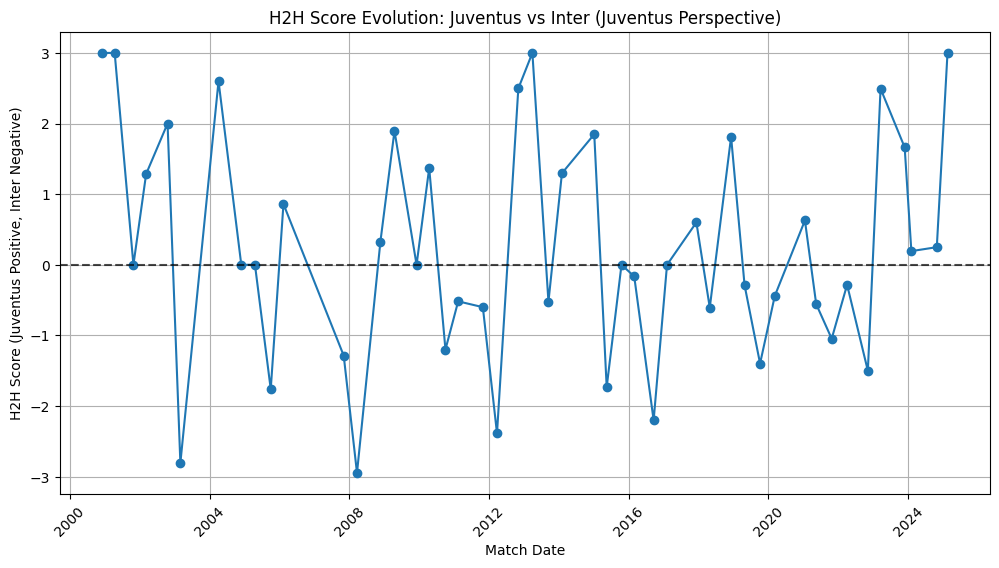

In [107]:
import matplotlib.pyplot as plt

# Filter matches between Juventus and Inter (regardless of home/away)
mask = (
    ((matches_clean["HomeTeam"] == "Juventus") & (matches_clean["AwayTeam"] == "Inter")) |
    ((matches_clean["HomeTeam"] == "Inter") & (matches_clean["AwayTeam"] == "Juventus"))
)
juve_inter_matches = matches_clean[mask].sort_values("MatchDate").copy()

# Always show H2H from Juventus' perspective
juve_inter_matches["H2H_Juve"] = juve_inter_matches.apply(
    lambda row: row["H2H"] if row["HomeTeam"] == "Juventus" else -row["H2H"], axis=1
)

plt.figure(figsize=(12, 6))
plt.plot(juve_inter_matches["MatchDate"], juve_inter_matches["H2H_Juve"], marker='o')
plt.title("H2H Score Evolution: Juventus vs Inter (Juventus Perspective)")
plt.xlabel("Match Date")
plt.ylabel("H2H Score (Juventus Positive, Inter Negative)")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Let's create a function to plot H2H scores for different teams

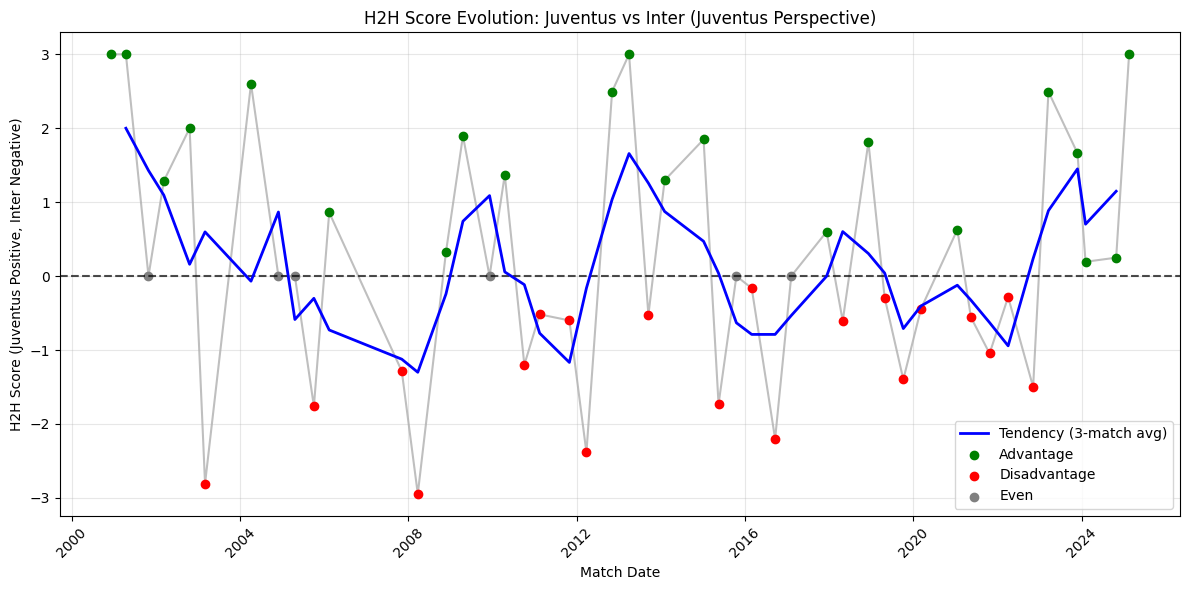

In [108]:
def plot_h2h_rivalry(matches_df, team_a, team_b, perspective=None, window=4):
    """
    Plot the H2H score evolution between two teams with a smoothed tendency line.
    
    Args:
        matches_df (pd.DataFrame): DataFrame with at least columns ['HomeTeam', 'AwayTeam', 'MatchDate', 'H2H']
        team_a (str): Name of the first team
        team_b (str): Name of the second team
        perspective (str or None): If set to team name, always show H2H from that team's perspective
        window (int): Window size for the rolling average (default=3)
    """
    # ...existing mask and perspective code...
    mask = (
        ((matches_df["HomeTeam"] == team_a) & (matches_df["AwayTeam"] == team_b)) |
        ((matches_df["HomeTeam"] == team_b) & (matches_df["AwayTeam"] == team_a))
    )
    h2h_matches = matches_df[mask].sort_values("MatchDate").copy()

    if perspective is not None:
        h2h_matches["H2H_Persp"] = h2h_matches.apply(
            lambda row: row["H2H"] if row["HomeTeam"] == perspective else -row["H2H"], axis=1
        )
        y = h2h_matches["H2H_Persp"]
        ylabel = f"H2H Score ({perspective} Positive, {team_b if perspective == team_a else team_a} Negative)"
    else:
        y = h2h_matches["H2H"]
        ylabel = "H2H Score (from Home Team Perspective)"

    # Calculate rolling average for tendency
    rolling_avg = y.rolling(window=window, center=True).mean()

    plt.figure(figsize=(12, 6))
    # Plot connecting line in gray
    plt.plot(h2h_matches["MatchDate"], y, color='gray', alpha=0.5, zorder=1)
    # Add rolling average line
    plt.plot(h2h_matches["MatchDate"], rolling_avg, color='blue', linewidth=2, 
            label=f'Tendency ({window}-match avg)', zorder=3)
    
    # Then overlay colored points
    above = y > 0
    below = y < 0
    equal = y == 0
    
    plt.scatter(h2h_matches["MatchDate"][above], y[above], color='green', label='Advantage', zorder=2)
    plt.scatter(h2h_matches["MatchDate"][below], y[below], color='red', label='Disadvantage', zorder=2)
    plt.scatter(h2h_matches["MatchDate"][equal], y[equal], color='gray', label='Even', zorder=2)
    
    plt.title(f"H2H Score Evolution: {team_a} vs {team_b}" + (f" ({perspective} Perspective)" if perspective else ""))
    plt.xlabel("Match Date")
    plt.ylabel(ylabel)
    plt.axhline(0, color="black", linestyle="--", alpha=0.7)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_h2h_rivalry(matches_clean, "Juventus", "Inter", perspective="Juventus", window=3)

### Rest Day Difference 

Let's calculate the rest day difference between home and away team.

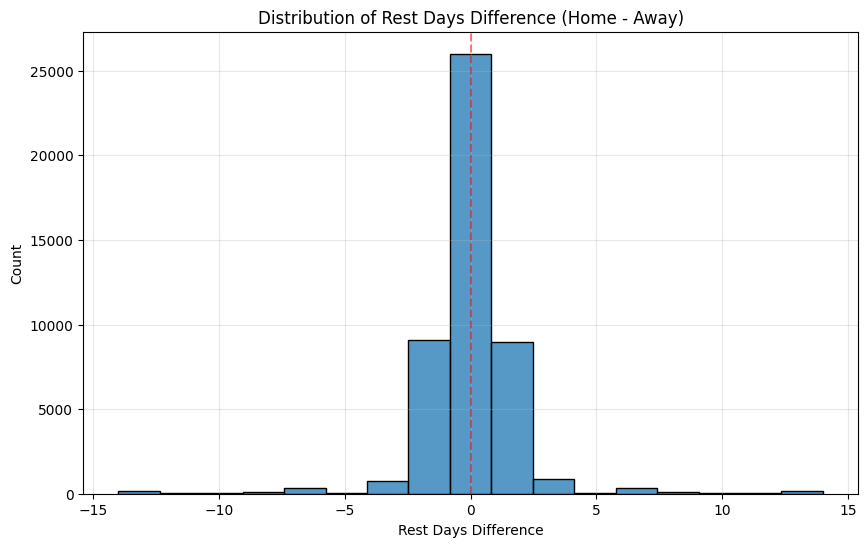

In [109]:
def calculate_rest_days(matches_df):
    """
    Calculate rest days between matches for each team.
    Rest days = days since last match.
    Resets tracking at start of each season (using 60-day gap heuristic).
    Clips rest days difference at ±14 days to account for international breaks.
    """
    # Sort matches by date and division
    matches_sorted = matches_df.sort_values(['Division', 'MatchDate'])
    
    # Initialize tracking dictionaries
    team_last_match = {}
    rest_days = []
    
    # Season gap threshold (in days)
    SEASON_GAP = 60
    # Maximum rest difference to consider (international breaks ~14 days)
    MAX_REST_DIFF = 14
    
    for idx, row in matches_sorted.iterrows():
        home_team = row['HomeTeam']
        away_team = row['AwayTeam']
        match_date = row['MatchDate']
        division = row['Division']
        
        # Initialize division dictionary if needed
        if division not in team_last_match:
            team_last_match[division] = {}
            
        # Calculate rest days for home team
        if home_team in team_last_match[division]:
            days_since_last = (match_date - team_last_match[division][home_team]).days
            # Reset if gap suggests new season
            home_rest = 7 if days_since_last > SEASON_GAP else days_since_last
        else:
            home_rest = 7
            
        # Calculate rest days for away team
        if away_team in team_last_match[division]:
            days_since_last = (match_date - team_last_match[division][away_team]).days
            # Reset if gap suggests new season
            away_rest = 7 if days_since_last > SEASON_GAP else days_since_last
        else:
            away_rest = 7
        
        # Store rest days difference (positive means home team had more rest)
        rest_diff = home_rest - away_rest
        # Clip extreme values to account for international breaks
        rest_diff = max(min(rest_diff, MAX_REST_DIFF), -MAX_REST_DIFF)
        rest_days.append(rest_diff)
        
        # Update last match dates
        team_last_match[division][home_team] = match_date
        team_last_match[division][away_team] = match_date
    
    return rest_days

# Calculate rest days difference and add as new feature
matches_clean["RestDaysDiff"] = calculate_rest_days(matches_clean)

# Let's visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=matches_clean, x="RestDaysDiff")
plt.title("Distribution of Rest Days Difference (Home - Away)")
plt.xlabel("Rest Days Difference")
plt.ylabel("Count")
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.show()

In [110]:
# Check basic statistics
print("\nRest Days Difference Statistics:")
print(matches_clean["RestDaysDiff"].describe())


Rest Days Difference Statistics:
count    47007.000000
mean         0.008212
std          1.837532
min        -14.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: RestDaysDiff, dtype: float64


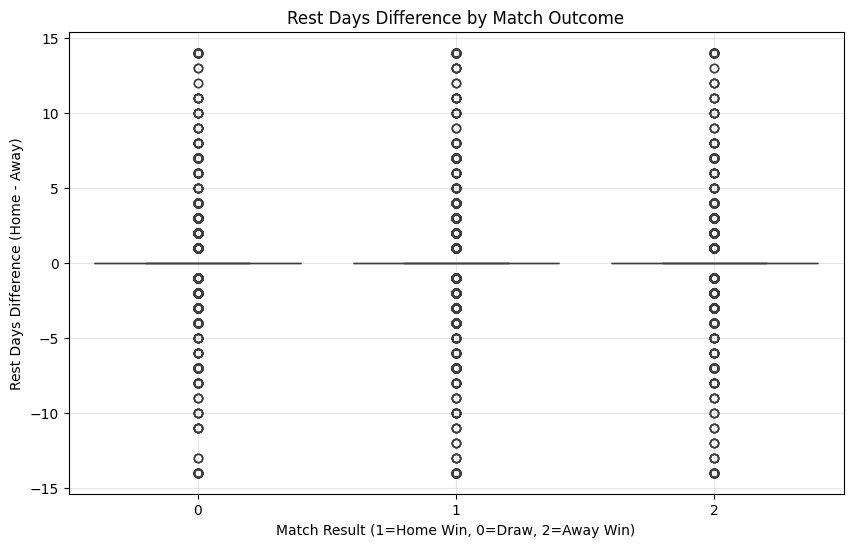

In [111]:
# See if rest days difference affects match outcomes
plt.figure(figsize=(10, 6))
sns.boxplot(x="FTResult", y="RestDaysDiff", data=matches_clean)
plt.title("Rest Days Difference by Match Outcome")
plt.xlabel("Match Result (1=Home Win, 0=Draw, 2=Away Win)")
plt.ylabel("Rest Days Difference (Home - Away)")
plt.grid(True, alpha=0.3)
plt.show()

The data suggests that rest day differences don't significantly impact match outcomes in top European leagues. This could be because:

- Leagues try to maintain fair scheduling
- Professional teams are well-conditioned to handle varying rest periods
- Other factors (like team quality, home advantage) have stronger influence on results

The feature might still be useful in extreme cases (very short rest vs long rest) but shouldn't be weighted too heavily in the prediction model. Let's drop it from the dataset for now



In [112]:
matches_clean = matches_clean.drop(columns=["RestDaysDiff"])
matches_clean.head()

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,EloDiff,FormDiff,H2H
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,1,99.77,0.0,0.0
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,1,72.38,0.0,0.0
12,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,2,11.36,0.0,0.0
13,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,0,61.23,0.0,0.0
14,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,0,-42.23,0.0,0.0


### Derby Feature

Derbies may add impredictability.

/var/folders/7x/0ykljy_s2f1dzc4k9s_y_hxc0000gn/T/ipykernel_38855/915565423.py:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=matches_clean, x='IsDerby', y='FTHome', ci=None)


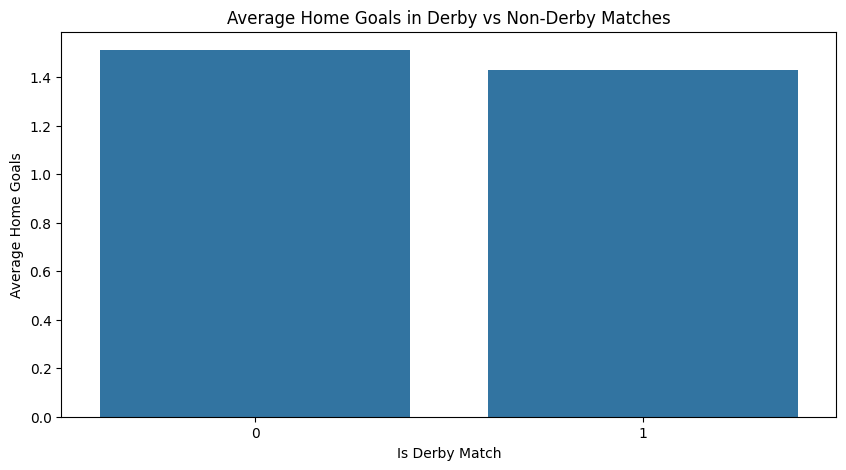

In [113]:
def add_derby_feature(df):
    """Add derby feature based on city/regional rivalries."""
    # Define major derbies and rivalries for each league
    
    derbies = {
    'E1': [  # Premier League
        {'Manchester': ['Man City', 'Man United', 'Manchester City', 'Manchester Utd']},
        {'London': ['Arsenal', 'Chelsea', 'Tottenham', 'West Ham', 'Crystal Palace', 'Fulham', 
                   'Brentford', 'QPR', 'Charlton', 'Millwall']},
        {'Liverpool': ['Liverpool', 'Everton']},
        {'North East': ['Newcastle', 'Sunderland', 'Middlesbrough']},
        {'Midlands': ['Aston Villa', 'Birmingham', 'West Brom', 'Wolves', 'Leicester', 
                     'Nott\'m Forest', 'Derby', 'Stoke']},
    ],
    'I1': [  # Serie A
        {'Milan': ['Milan', 'Inter', 'AC Milan', 'Internazionale']},
        {'Rome': ['Roma', 'Lazio', 'AS Roma', 'SS Lazio']},
        {'Turin': ['Juventus', 'Torino']},
        {'Genoa': ['Genoa', 'Sampdoria']},
        {'Verona': ['Verona', 'Chievo', 'Hellas Verona']},
        {'Tuscany': ['Fiorentina', 'Empoli', 'Siena']},
        {'Sicily': ['Palermo', 'Catania']},
    ],
    'SP1': [  # La Liga
        {'Madrid': ['Real Madrid', 'Atletico Madrid', 'Getafe', 'Rayo Vallecano', 'Leganes']},
        {'Barcelona': ['Barcelona', 'Espanyol', 'Girona']},
        {'Seville': ['Sevilla', 'Betis', 'Real Betis']},
        {'Basque': ['Ath Bilbao', 'Athletic Bilbao', 'Real Sociedad', 'Alaves', 'Eibar', 
                    'Osasuna']},
        {'Valencia': ['Valencia', 'Levante', 'Villarreal', 'Elche']},
    ],
    'D1': [  # Bundesliga
        {'Berlin': ['Hertha', 'Union Berlin']},
        {'Ruhr': ['Schalke 04', 'Dortmund', 'Borussia Dortmund', 'Bochum']},
        {'Bavaria': ['Bayern Munich', 'Augsburg', 'Nurnberg']},
        {'Hamburg': ['Hamburg', 'St Pauli']},
        {'Rhine': ['FC Koln', 'Cologne', 'Leverkusen', 'Bayer Leverkusen', 
                  'M\'gladbach', 'Fortuna Dusseldorf', 'Mainz']},
    ],
    'F1': [  # Ligue 1
        {'Paris': ['Paris SG', 'PSG', 'Paris FC']},
        {'Rhone-Alps': ['Lyon', 'St Etienne', 'Saint-Etienne']},
        {'Cote dAzur': ['Nice', 'Monaco', 'Marseille']},
        {'North': ['Lille', 'Lens', 'Valenciennes']},
        {'Brittany': ['Rennes', 'Nantes', 'Brest', 'Lorient']},
        {'Normandy': ['Caen', 'Le Havre']},
    ]
}
    
    def is_derby(row):
        if row['Division'] not in derbies:
            return 0
        
        for city_derbies in derbies[row['Division']]:
            for city, teams in city_derbies.items():
                if row['HomeTeam'] in teams and row['AwayTeam'] in teams:
                    return 1
        return 0
    
    df['IsDerby'] = df.apply(is_derby, axis=1)
    return df


# Add new featuree
matches_clean = add_derby_feature(matches_clean)

# Visualize derby impact
plt.figure(figsize=(10, 5))
sns.barplot(data=matches_clean, x='IsDerby', y='FTHome', ci=None)
plt.title('Average Home Goals in Derby vs Non-Derby Matches')
plt.xlabel('Is Derby Match')
plt.ylabel('Average Home Goals')
plt.show()

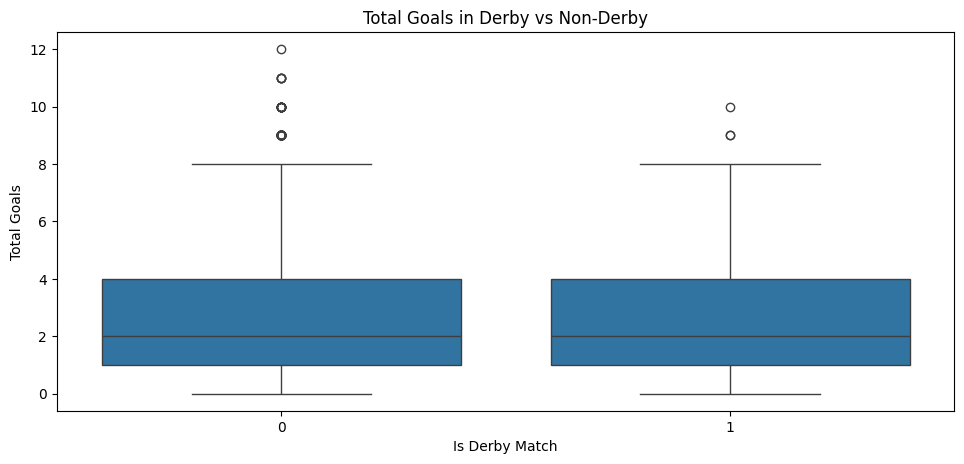


Derby Match Statistics:
----------------------
Number of Derby Matches: 1584
Percentage of Derby Matches: 3.37%

Average Goals Per Match:
Derby Matches: 2.57
Non-Derby Matches: 2.66


In [115]:
# Create multiple visualizations to analyze derby impact
plt.figure(figsize=(10, 5))  # Reduced from 20,5 to 15,5

# First calculate total goals
matches_clean['TotalGoals'] = matches_clean['FTHome'] + matches_clean['FTAway']

# Plot 3: Total Goals Distribution
sns.boxplot(data=matches_clean, x='IsDerby', y='TotalGoals')
plt.title('Total Goals in Derby vs Non-Derby')
plt.xlabel('Is Derby Match')
plt.ylabel('Total Goals')

plt.tight_layout(pad=2.0)  # Added padding between subplots
plt.show()

# Print statistics
print("\nDerby Match Statistics:")
print("----------------------")
print(f"Number of Derby Matches: {matches_clean['IsDerby'].sum()}")
print(f"Percentage of Derby Matches: {(matches_clean['IsDerby'].mean() * 100):.2f}%")
print("\nAverage Goals Per Match:")
print(f"Derby Matches: {matches_clean[matches_clean['IsDerby']==1]['TotalGoals'].mean():.2f}")
print(f"Non-Derby Matches: {matches_clean[matches_clean['IsDerby']==0]['TotalGoals'].mean():.2f}")

# Remove the TotalGoals column as it's no longer needed
matches_clean = matches_clean.drop(columns=['TotalGoals'])

## Save to CSV

In [116]:
# Let's drop FTHome and FTAway as they are now redundant
matches_clean = matches_clean.drop(columns=["FTHome", "FTAway"])
# Save the cleaned and processed data
matches_clean.to_csv("data/processed/matches_processed.csv", index=False)

In [117]:
matches_clean.tail(20)

,Division,MatchDate,HomeTeam,AwayTeam,FTResult,EloDiff,FormDiff,H2H,IsDerby
228313,I1,2025-02-23,Como,Napoli,1,-266.80,-1.2,0.489229,0
228314,E1,2025-02-23,Watford,Luton,1,15.25,2.6,0.968689,0
228320,SP1,2025-02-23,Ath Bilbao,Valladolid,1,255.22,6.6,-0.726513,0
228326,F1,2025-02-23,Nantes,Lens,1,-143.64,-0.4,-2.564547,0
228327,I1,2025-02-23,Verona,Fiorentina,1,-180.64,-2.0,-0.362294,0
228331,D1,2025-02-23,RB Leipzig,Heidenheim,0,190.46,5.8,-1.431731,0
228336,SP1,2025-02-23,Real Madrid,Girona,1,270.33,1.4,-2.881772,0
228342,F1,2025-02-23,Le Havre,Toulouse,2,-128.90,2.0,-2.366569,0
228343,F1,2025-02-23,Nice,Montpellier,1,121.05,5.8,-1.416225,0
228344,F1,2025-02-23,Strasbourg,Brest,0,-31.22,1.2,-0.677419,0
